# Testing Notebook

This notebook is used for running development version of the Vortector

Go to the git repository root.

In [1]:
import os
from subprocess import run
res = run(["git", "rev-parse", "--show-toplevel"], capture_output=True)
root_dir = res.stdout.decode().strip()
os.chdir(root_dir)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%reload_ext autoreload
%autoreload 2

from src.vortector.vortector import Vortector
from src.vortector.visualize import show_fit_overview_2D, show_fit_overview_1D
from src.vortector.contour import detect_elliptic_contours

%matplotlib inline

In [7]:
from synthvortex import VortexGenerator
vgen = VortexGenerator(2, periodic_y=True)

CPU times: user 384 ms, sys: 176 ms, total: 560 ms
Wall time: 141 ms
Number of vortices: 2


146592176738032019382495260067825009482

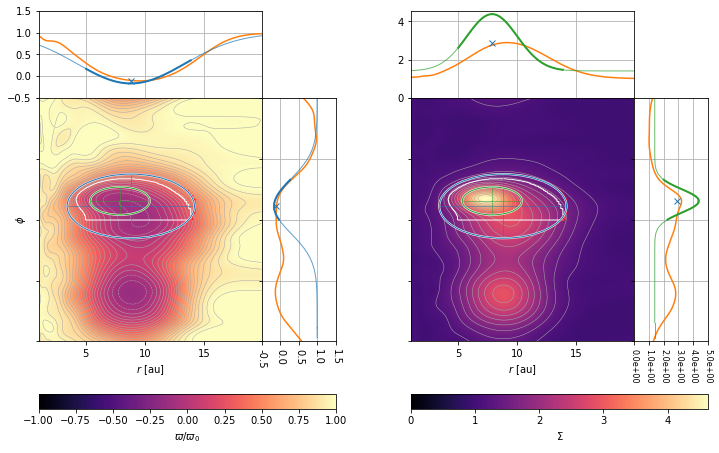

In [15]:
from synthvortex import VortexGenerator
scaling = 2
vgen = VortexGenerator(3, periodic_y=True, Nr=121*scaling,Nphi=251*scaling, seed=146592176738032019382495260067825009482)
# vgen = VortexGenerator(3, periodic_y=True, Nr=121*scaling,Nphi=251*scaling, seed=123009799731638641813521844717530781350, noise=0)
# vgen = VortexGenerator(filename="synthvort_examples/detection_overlapping_vortices.pickle")
vd = Vortector(vgen.Rs, vgen.Phis, vgen.Area, vgen.vortensity, vgen.density, verbose=False)
%time vd.detect(include_mask=True)
n = 0
show_fit_overview_2D(vd, n=n, fig=plt.figure(figsize=(12,8)))
print("Number of vortices:", len(vd.vortices))
vgen.seed

CPU times: user 536 ms, sys: 281 ms, total: 817 ms
Wall time: 211 ms


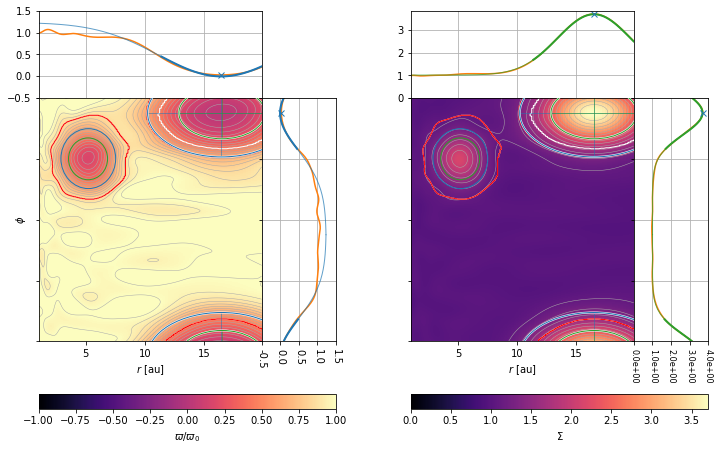

In [9]:
vgen = VortexGenerator(2, periodic_y=True, Nr=121*2,Nphi=251*2, seed=9723599775470169977509137115848099204)
vd = Vortector(vgen.Rs, vgen.Phis, vgen.Area, vgen.vortensity, vgen.density)
%time vd.detect(include_mask=True)
fig = plt.figure(figsize=(12,8))
show_fit_overview_2D(vd, fig=fig)

In [10]:
for vort in vd.vortices:
    print(vort["contour"]["stats"]["vortensity_min"])

0.027617490834275765
0.17575599944213816


In [16]:
name = "clipping"
filename = f"synthvort_examples/{name}.pickle"
note="n=0 contour is clipped at phi=0."
import os
if os.path.exists(filename):
    print("This file already exists. Please use another filename.")
else:
    vgen.save(filename, 
              note="There are two overlapping vortices and one of them is not detected.")

## Extracting Data from the vortex region

We know where the vortex is, so we can also selectively extract the data in its region.

E.g. let's plot the vortensity and surface density of only the vortex.

In [35]:
def vort_sigma_plot(fig,Rs,Phis,vortensity,density,mask):
    fig.clf()
    gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    axes = [fig.add_subplot(gs[0, 0]),fig.add_subplot(gs[0, 1])]

    vort_masked = np.ma.masked_array(vortensity, mask=~mask)
    im = axes[0].pcolormesh(Rs, Phis, vort_masked, vmin=0, vmax=1, shading="auto")
    axes[0].contour(Rs, Phis, vort_masked, cmap="Greys", linewidths=1)
    axes[0].set_xlabel("r")
    axes[0].set_ylabel("phi")
    cbar = fig.colorbar(im, ax=axes[0], orientation="horizontal")
    cbar.set_label("vortensity")

    density_masked = np.ma.masked_array(density, mask=~mask)
    im = axes[1].pcolormesh(Rs, Phis, density_masked, shading="auto")
    axes[1].contour(Rs, Phis, density_masked, cmap="Greys", linewidths=1)
    axes[1].set_xlabel("r")
    cbar = fig.colorbar(im, ax=axes[1], orientation="horizontal")
    cbar.set_label("density")

<IPython.core.display.Javascript object>


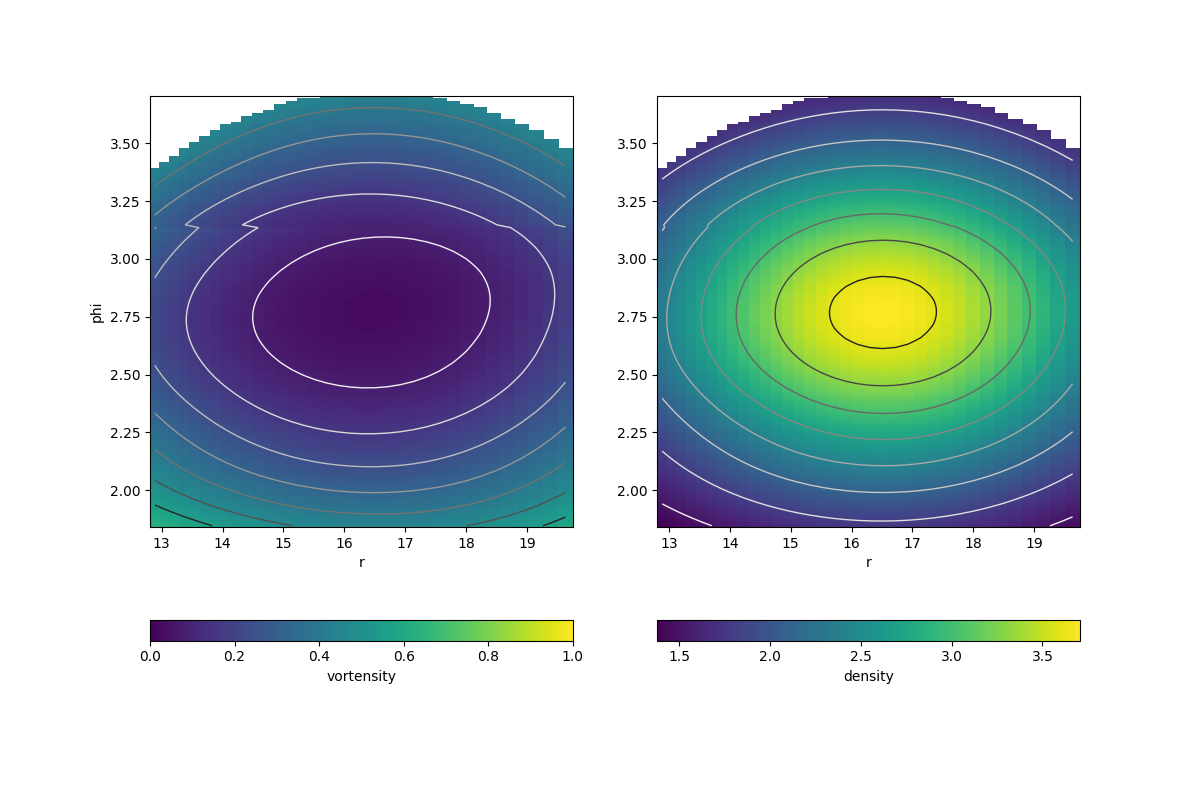

In [38]:
vd.detect(include_mask=True)
vort_data = vd.extract_data(vd.vortices[0], region="combined")
vort_sigma_plot(plt.figure(figsize=(12,8)), *vort_data)

In [10]:
vd.vortices[1]["contour"]

{'detection': {'contour_value': 0.6500000000000001,
  'opencv_contour_number': 33000,
  'uuid': 'dc043da8-ea5e-480f-88f7-3fa962a2d8ab',
  'pixel_area': 3037.0,
  'pixel_arcLength': 224.16652059555054,
  'bounding_x_img': array([ 56, 101], dtype=int32),
  'bounding_y_img': array([290, 377], dtype=int32),
  'pnt_xlow_img': array([ 56, 319], dtype=int32),
  'pnt_xhigh_img': array([101, 328], dtype=int32),
  'pnt_ylow_img': array([ 77, 290], dtype=int32),
  'pnt_yhigh_img': array([ 84, 377], dtype=int32),
  'dx_img': 45,
  'dy_img': 87,
  'ellipse': {'center_img': (334.0018615722656, 78.95472717285156),
   'axesLengths_img': (45.0428466796875, 86.45751190185547),
   'angle_img': 93.6780014038086},
  'ellipse_area_delta_relative': 0.053850483385040226,
  'ellipse_area_delta': 163.54391804036717,
  'parameters': {'Nx': 121,
   'Ny': 251,
   'max_ellipse_aspect_ratio': inf,
   'max_ellipse_deviation': 0.15,
   'levels': [-1.0,
    -0.95,
    -0.9,
    -0.85,
    -0.8,
    -0.75,
    -0.7,
   